In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context("poster")
sns.set_context("talk", 1.0, {"lines.linewidth": 3})

In [4]:
import preprocessing as pre
pre.

In [2]:
import inspect
print(inspect.getsource(pd))

# pylint: disable-msg=W0614,W0401,W0611,W0622

# flake8: noqa

__docformat__ = 'restructuredtext'

# Let users know if they're missing any of our hard dependencies
hard_dependencies = ("numpy", "pytz", "dateutil")
missing_dependencies = []

for dependency in hard_dependencies:
    try:
        __import__(dependency)
    except ImportError as e:
        missing_dependencies.append(dependency)

if missing_dependencies:
    raise ImportError("Missing required dependencies {0}".format(missing_dependencies))
del hard_dependencies, dependency, missing_dependencies

# numpy compat
from pandas.compat.numpy import *

try:
    from pandas import hashtable, tslib, lib
except ImportError as e:  # pragma: no cover
    module = str(e).lstrip('cannot import name ')  # hack but overkill to use re
    raise ImportError("C extension: {0} not built. If you want to import "
                      "pandas from the source directory, you may need to run "
                      "'python setup.py build_ext --in

In [3]:
#データを取得
df21_1s = pd.read_csv("./取得データセット/受信機1/nkmr1-dataset21.csv")
df21_2s = pd.read_csv("./取得データセット/受信機2/nkmr2-dataset21.csv")
df21_3s = pd.read_csv("./取得データセット/受信機3/nkmr3-dataset21.csv")
df21_4s = pd.read_csv("./取得データセット/受信機4/nkmr4-dataset21.csv")

#それぞれのカラムを設定
df21_1s.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df21_2s.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df21_3s.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df21_4s.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]

df_s = df21_1s.append(df21_2s).append(df21_3s).append(df21_4s)

#print(df)

#同期ビーコンのid
set_uuid = "1000000007ae1001b000001c4d8dffff"

#送信機のid
id1 = "10000000aaaa41441111110000000000"
id2 = "20000000aaaa41441111110000000000"
id3 = "30000000aaaa41441111110000000000"
id4 = "40000000aaaa41441111110000000000"
id5 = "50000000aaaa41441111110000000000"
id6 = "60000000aaaa41441111110000000000"
id7 = "70000000aaaa41441111110000000000"
id8 = "80000000aaaa41441111110000000000" 
id9 = "90000000aaaa41441111110000000000"
id10 = "a0000000aaaa41441111110000000000"

#locateを作成
df_s["locate"] = 0
df_s.locate = df_s.locate.where(df_s.UUIDs != id1,1)
df_s.locate = df_s.locate.where(df_s.UUIDs != id2,2)
df_s.locate = df_s.locate.where(df_s.UUIDs != id3,3)
df_s.locate = df_s.locate.where(df_s.UUIDs != id4,4)
df_s.locate = df_s.locate.where(df_s.UUIDs != id5,5)
df_s.locate = df_s.locate.where(df_s.UUIDs != id6,6)
df_s.locate = df_s.locate.where(df_s.UUIDs != id7,7)
df_s.locate = df_s.locate.where(df_s.UUIDs != id8,8)
df_s.locate = df_s.locate.where(df_s.UUIDs != id9,9)
df_s.locate = df_s.locate.where(df_s.UUIDs != id10,10)
df_s.locate = df_s.locate.astype(int)

#deviceを作成
df_s["device"] = 0
df_s.device = df_s.device.where(df_s.device_name != "rasp1",1)
df_s.device = df_s.device.where(df_s.device_name != "nkmr-2",2)
df_s.device = df_s.device.where(df_s.device_name != "rasp3",3)
df_s.device = df_s.device.where(df_s.device_name != "nkmr-4",4)

#座標を与える
df_s["x"] = 0
df_s["y"] = 0
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id1,0),df_s.y.where(df_s.UUIDs != id1,1500)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id2,0),df_s.y.where(df_s.UUIDs != id2,1000)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id3,0),df_s.y.where(df_s.UUIDs != id3,500)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id4,450),df_s.y.where(df_s.UUIDs != id4,2000)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id5,450),df_s.y.where(df_s.UUIDs != id5,1320)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id6,450),df_s.y.where(df_s.UUIDs != id6,660)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id7,450),df_s.y.where(df_s.UUIDs != id7,0)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id8,900),df_s.y.where(df_s.UUIDs != id8,1500)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id9,900),df_s.y.where(df_s.UUIDs != id9,1000)
df_s.x,df_s.y = df_s.x.where(df_s.UUIDs != id10,900),df_s.y.where(df_s.UUIDs != id10,500)

#発信機ごとに分ける
df_1 = df_s[(df_s.UUIDs == id1) | (df_s.UUIDs == set_uuid)]
df_2 = df_s[(df_s.UUIDs == id2) | (df_s.UUIDs == set_uuid)]
df_3 = df_s[(df_s.UUIDs == id3) | (df_s.UUIDs == set_uuid)]
df_4 = df_s[(df_s.UUIDs == id4) | (df_s.UUIDs == set_uuid)]
df_5 = df_s[(df_s.UUIDs == id5) | (df_s.UUIDs == set_uuid)]
df_6 = df_s[(df_s.UUIDs == id6) | (df_s.UUIDs == set_uuid)]
df_7 = df_s[(df_s.UUIDs == id7) | (df_s.UUIDs == set_uuid)]
df_8 = df_s[(df_s.UUIDs == id8) | (df_s.UUIDs == set_uuid)]
df_9 = df_s[(df_s.UUIDs == id9) | (df_s.UUIDs == set_uuid)]
df_10 = df_s[(df_s.UUIDs == id10) | (df_s.UUIDs == set_uuid)]

df_list = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10]

In [4]:
df_s.device_name

array(['rasp1', 'nkmr-2', 'rasp3', 'nkmr-4'], dtype=object)

/Users/tomanan/anaconda/envs/py34/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


データ数:14038
平均値:-75.55599472990777
分散:9.499697093478236



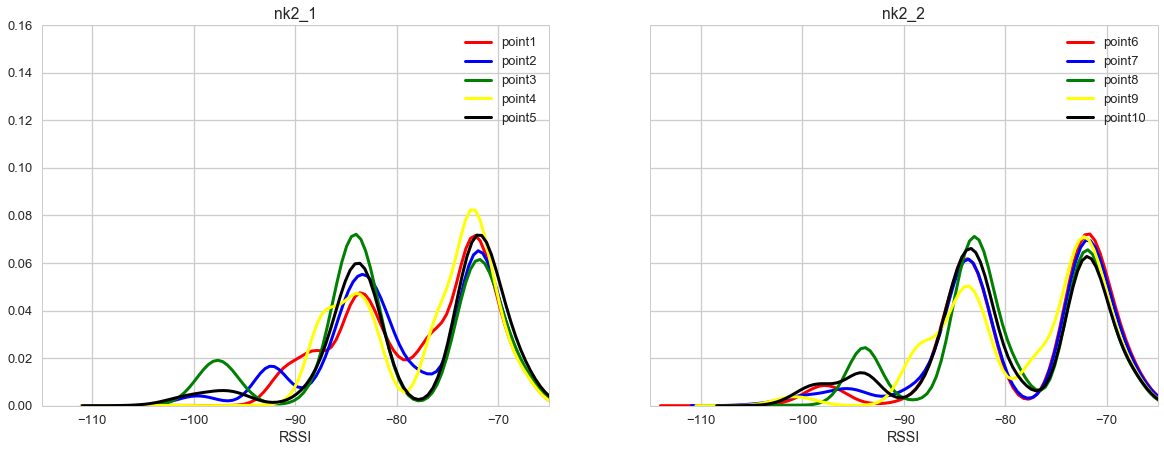

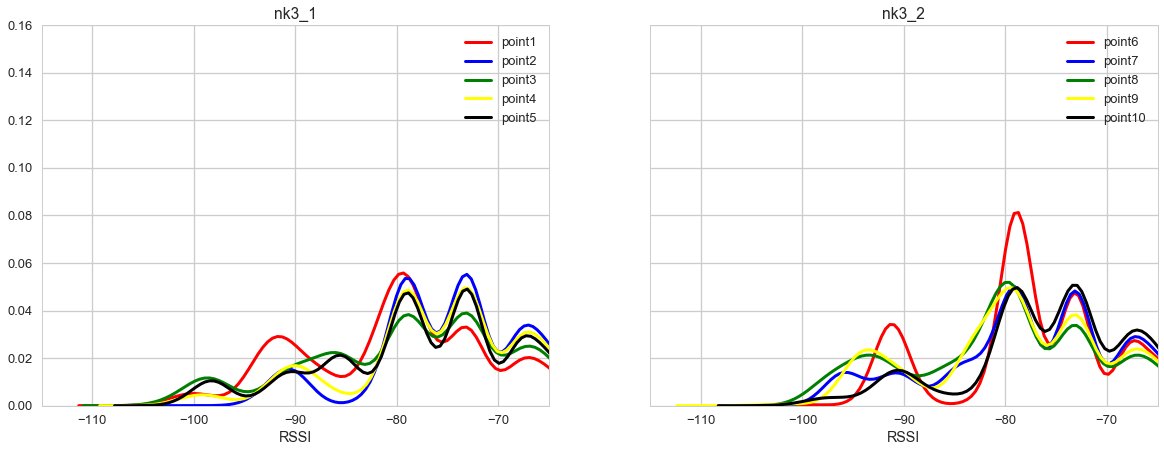

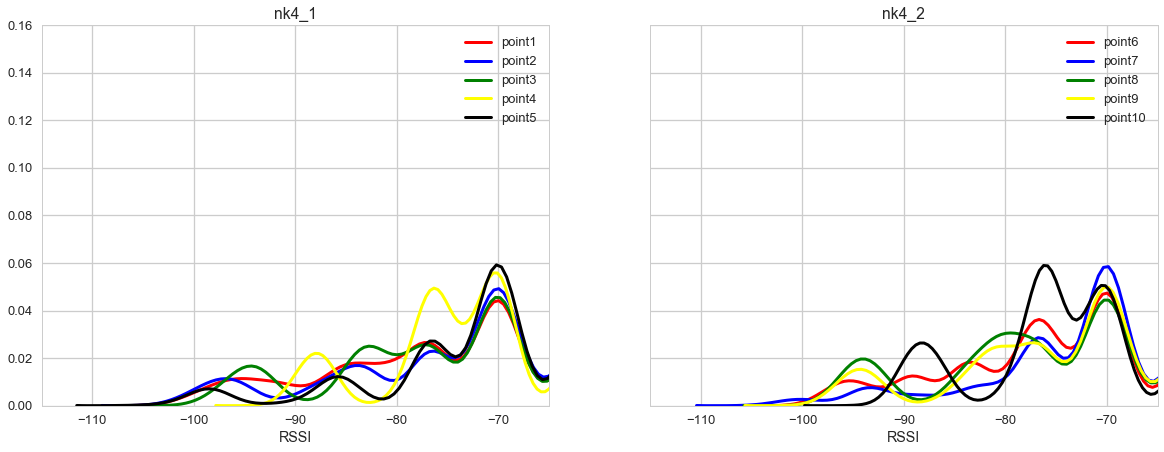

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20,7), sharex=True,  sharey=True)
fig, (ax3, ax4) = plt.subplots(ncols=2,figsize=(20,7), sharex=True,  sharey=True)
fig, (ax5, ax6) = plt.subplots(ncols=2,figsize=(20,7), sharex=True,  sharey=True)
ax1.set_xlim([-115,-65])
ax1.set_ylim([0,0.16])
ax3.set_xlim([-115,-65])
ax3.set_ylim([0,0.16])
ax5.set_xlim([-115,-65])
ax5.set_ylim([0,0.16])
ax1.set_title("nk2_1")
ax2.set_title("nk2_2")
ax3.set_title("nk3_1")
ax4.set_title("nk3_2")
ax5.set_title("nk4_1")
ax6.set_title("nk4_2")

colors = ["red","blue","green","yellow","black","brown","pink",]

#for i in range(len(df_list)//2):
#    for c in colors:
#        sns.distplot(df_list[i][df_list[i].device == 2]["RSSI"],hist=False,color=c,kde_kws={"label": i},ax=ax2)

#for i in range(len(df_list)//2):
#    for c in colors:
#        sns.distplot(df_list[i][df_list[i].device == 3]["RSSI"],hist=False,color=c,kde_kws={"label": i},ax=ax3)

#for i in range(len(df_list)//2):
#    for c in colors:

sns.distplot(df_list[0][df_list[0].device == 2]["RSSI"],hist=False,color="red",kde_kws={"label": "point1"},ax=ax1)
sns.distplot(df_list[1][df_list[1].device == 2]["RSSI"],hist=False,color="blue",kde_kws={"label": "point2"},ax=ax1)
sns.distplot(df_list[2][df_list[2].device == 2]["RSSI"],hist=False,color="green",kde_kws={"label": "point3"},ax=ax1)
sns.distplot(df_list[3][df_list[3].device == 2]["RSSI"],hist=False,color="yellow",kde_kws={"label": "point4"},ax=ax1)
sns.distplot(df_list[4][df_list[4].device == 2]["RSSI"],hist=False,color="black",kde_kws={"label": "point5"},ax=ax1)
#sns.distplot(df_list[5][df_list[5].device == 1]["RSSI"],hist=False,color="brown",kde_kws={"label": "point6"},ax=ax1)
#sns.distplot(df_list[6][df_list[6].device == 1]["RSSI"],hist=False,color="pink",kde_kws={"label": "point7"},ax=ax1)

sns.distplot(df_list[5][df_list[5].device == 2]["RSSI"],hist=False,color="red",kde_kws={"label": "point6"},ax=ax2)
sns.distplot(df_list[6][df_list[6].device == 2]["RSSI"],hist=False,color="blue",kde_kws={"label": "point7"},ax=ax2)
sns.distplot(df_list[7][df_list[7].device == 2]["RSSI"],hist=False,color="green",kde_kws={"label": "point8"},ax=ax2)
sns.distplot(df_list[8][df_list[8].device == 2]["RSSI"],hist=False,color="yellow",kde_kws={"label": "point9"},ax=ax2)
sns.distplot(df_list[9][df_list[9].device == 2]["RSSI"],hist=False,color="black",kde_kws={"label": "point10"},ax=ax2)
#sns.distplot(df_list[5][df_list[5].device == 2]["RSSI"],hist=False,color="brown",kde_kws={"label": "point6"},ax=ax2)
#sns.distplot(df_list[6][df_list[6].device == 2]["RSSI"],hist=False,color="pink",kde_kws={"label": "point7"},ax=ax2)

sns.distplot(df_list[0][df_list[0].device == 3]["RSSI"],hist=False,color="red",kde_kws={"label": "point1"},ax=ax3)
sns.distplot(df_list[1][df_list[1].device == 3]["RSSI"],hist=False,color="blue",kde_kws={"label": "point2"},ax=ax3)
sns.distplot(df_list[2][df_list[2].device == 3]["RSSI"],hist=False,color="green",kde_kws={"label": "point3"},ax=ax3)
sns.distplot(df_list[3][df_list[3].device == 3]["RSSI"],hist=False,color="yellow",kde_kws={"label": "point4"},ax=ax3)
sns.distplot(df_list[4][df_list[4].device == 3]["RSSI"],hist=False,color="black",kde_kws={"label": "point5"},ax=ax3)
#sns.distplot(df_list[5][df_list[5].device == 3]["RSSI"],hist=False,color="brown",kde_kws={"label": "point6"},ax=ax3)
#sns.distplot(df_list[6][df_list[6].device == 3]["RSSI"],hist=False,color="pink",kde_kws={"label": "point7"},ax=ax3)

sns.distplot(df_list[5][df_list[5].device == 3]["RSSI"],hist=False,color="red",kde_kws={"label": "point6"},ax=ax4)
sns.distplot(df_list[6][df_list[6].device == 3]["RSSI"],hist=False,color="blue",kde_kws={"label": "point7"},ax=ax4)
sns.distplot(df_list[7][df_list[7].device == 3]["RSSI"],hist=False,color="green",kde_kws={"label": "point8"},ax=ax4)
sns.distplot(df_list[8][df_list[8].device == 3]["RSSI"],hist=False,color="yellow",kde_kws={"label": "point9"},ax=ax4)
sns.distplot(df_list[9][df_list[9].device == 3]["RSSI"],hist=False,color="black",kde_kws={"label": "point10"},ax=ax4)
#sns.distplot(df_list[5][df_list[5].device == 1]["RSSI"],hist=False,color="brown",kde_kws={"label": "point6"},ax=ax1)
#sns.distplot(df_list[6][df_list[6].device == 1]["RSSI"],hist=False,color="pink",kde_kws={"label": "point7"},ax=ax1)

sns.distplot(df_list[0][df_list[0].device == 4]["RSSI"],hist=False,color="red",kde_kws={"label": "point1"},ax=ax5)
sns.distplot(df_list[1][df_list[1].device == 4]["RSSI"],hist=False,color="blue",kde_kws={"label": "point2"},ax=ax5)
sns.distplot(df_list[2][df_list[2].device == 4]["RSSI"],hist=False,color="green",kde_kws={"label": "point3"},ax=ax5)
sns.distplot(df_list[3][df_list[3].device == 4]["RSSI"],hist=False,color="yellow",kde_kws={"label": "point4"},ax=ax5)
sns.distplot(df_list[4][df_list[4].device == 4]["RSSI"],hist=False,color="black",kde_kws={"label": "point5"},ax=ax5)

sns.distplot(df_list[5][df_list[5].device == 4]["RSSI"],hist=False,color="red",kde_kws={"label": "point6"},ax=ax6)
sns.distplot(df_list[6][df_list[6].device == 4]["RSSI"],hist=False,color="blue",kde_kws={"label": "point7"},ax=ax6)
sns.distplot(df_list[7][df_list[7].device == 4]["RSSI"],hist=False,color="green",kde_kws={"label": "point8"},ax=ax6)
sns.distplot(df_list[8][df_list[8].device == 4]["RSSI"],hist=False,color="yellow",kde_kws={"label": "point9"},ax=ax6)
sns.distplot(df_list[9][df_list[9].device == 4]["RSSI"],hist=False,color="black",kde_kws={"label": "point10"},ax=ax6)

print("データ数:%s" % df_list[7][df_list[7].device == 1]["RSSI"].count())
print("平均値:%s" % df_list[0][df_list[0].device == 2]["RSSI"].mean())
print("分散:%s\n" % df_list[0][df_list[0].device == 2]["RSSI"].std())

### 時刻合わせ

In [6]:
#　オブジェクト型の目的変数を数値情報に変換
import sklearn.preprocessing as sp

# 前処理用のインスタンスを宣言
le = sp.LabelEncoder()

def set_time(data,set_uuid):
    """
    時刻合わせを行う
    第一引数はdataframe
    第２引数は時刻合わせを行うUUID
    """
    # 時刻合わせ用のビーコンを1秒間隔に設定
    set_time_df = data[data.UUIDs == set_uuid].drop_duplicates(['Minor'],keep = "first")
    # 時刻合わせ用ビーコン以外を定義
    df = data[data.UUIDs != set_uuid]
    # データを結合してインデックスでソート
    df = df.append(set_time_df).sort_index(ascending=True)
    # 時刻合わせ用ビーコンを取得した行にtimeカラムを設定
    df["time"] = df["Minor"].where(df["UUIDs"] == set_uuid)
    # 時刻合わせを行い欠損値がある部分は削除
    df = df.fillna(method="ffill").dropna()
    # int型に変換
    df["time"] = df["time"].astype(int)
    # 時刻合わせ用のビーコンデータ以外
    df = df[df["UUIDs"] != set_uuid]
    
    return df

# 前処理を各データフレームに行う
for (i,df) in enumerate(df_list):
    df_list[i] = set_time(df,set_uuid)
    # device_nameを変換
    #df_list[i]["device"] = le.fit_transform(df_list[i][df_list[i].columns[7]]) + 1

### 直接波と反射波を識別する

In [7]:
# KMeansライブラリをインポート
from sklearn.cluster import KMeans

In [8]:
def make_cluster(df_list,colum,*,N_CLUSTERS=2):
    """
          反射波と入射波を判別するクラスタを作成し描写を行う
          第1引数(地点毎のデータフレームが入ったリスト)
          第２引数(クラスタリングを行いたいカラムのリスト)
          第３引数(クラスタ数)
          データフレーム型でクラスタリング結果を返す
    """

    # 空のデータフレームを用意
    df_cluster = pd.DataFrame()
    concat_list = []
    #座標ごとに
    for df in df_list: 
        #受信機ごとに
        for dev in df.device_name.unique():
            #受信機ごとに分けたdataframe
            df_dev = df[df.device_name == dev].copy()
            # 指定されたカラムを利用してクラスタリング
            pred = KMeans(n_clusters=N_CLUSTERS).fit_predict(np.array(df_dev[colum]))
            # clusterカラムを作成し予測結果を代入
            df_dev.loc[:,("cluster")] = pred
            # RSSI値の平均値を比較して入射波と反射波の判定を行う
            if df_dev[df_dev["cluster"] == 0]["RSSI"].mean() > df_dev[df_dev["cluster"] == 1]["RSSI"].mean():
                pass
            else:
                df_dev.loc[df_dev["cluster"] == 0,"cluster"] = 3
                df_dev.loc[df_dev["cluster"] == 1,"cluster"] = 0
                df_dev.loc[df_dev["cluster"] == 3,"cluster"] = 1
            # 予測結果を格納
            df_cluster = pd.concat([df_cluster,df_dev],ignore_index=True)
        concat_list.append(df_cluster)
        # 空のデータフレームを用意
        df_cluster = pd.DataFrame()

    return concat_list

#前処理を各データフレームに行う
df_list = make_cluster(df_list,["RSSI","locate"]) 

In [9]:
len(df_s.device_name.unique())

4

### 1秒ごとのRSSIの平均値を取る

In [10]:
def max_value(df_list):
    # timeのmax値を計算
    for df in df_list:
        max_value = 0
        if max_value < df["time"].max():
            max_value = df["time"].max()
    return max_value

#forの部分の引数に変更
#座標として、引数にx,yを追加
def get_mean(df,colum_name,locate,x,y,time_max):    
    """
    処理時間かかります。
    時刻毎の中央値をとる
    第一引数、データフレーム
    第２引数、作成したいカラム名
    """
    # 空のデータフレームとリストを用意
    Direct_list = []
    Reflect_list = []
    mid_df = pd.DataFrame()
    
    # timeのユニーク数だけ
    for time_num in range(time_max): 
        # 受信機の数だけ
        for i in range(len(df_list[0]["device"].unique())): 
            # timeラベルが同じ値に対して平均値をとる
            Direct = df[(df["time"] == time_num) & (df["device"] == (i+1)) & (df["cluster"] == 0)]["RSSI"].mean()
            Reflect = df[(df["time"] == time_num) & (df["device"] == (i+1)) & (df["cluster"] == 1)]["RSSI"].mean()
            # 平均値をリストに追加する
            Direct_list.append(Direct)
            Reflect_list.append(Reflect)
        # 平均値を追加したリストに(時間、地点、クラスタ番号を追加)
        Direct_list.extend([time_num,locate,x,y,0])
        Reflect_list.extend([time_num,locate,x,y,1])
        # データフレームに各要素を追加
        mid_df = mid_df.append(pd.Series(Direct_list),ignore_index=True)
        mid_df = mid_df.append(pd.Series(Reflect_list),ignore_index=True)
        # 平均値のリストを初期化
        Direct_list = []
        Reflect_list = []
    # カラム名を定義
    mid_df.columns = [colum_name]
    
    return mid_df

#前処理を各データフレームと地点毎に行う
train_df = pd.DataFrame()
column_name = ["dev1","dev2","dev3","dev4","time","locate","x","y","cluster"]
#column_name = ["dev1","dev2","dev3","dev4","time","locate","cluster"]
time_max = max_value(df_list)

for df in df_list:
    locate = df["locate"].iloc[1]
    x = df["x"].iloc[1]
    y = df["y"].iloc[1]
    mid_df = get_mean(df,column_name,locate,x,y,time_max)
    train_df = pd.concat([train_df,mid_df])

In [12]:
#NANのある行を削除し、time,locate,x,y,clusterをintに変換
direct = train_df[train_df.cluster == 0].dropna(thresh=4).interpolate().dropna()
reflect = train_df[train_df.cluster == 1].dropna(thresh=4).interpolate().dropna()
train = pd.concat([direct,reflect])
train.locate = train.locate.astype("int")
train.time = train.time.astype("int")
train.x = train.x.astype("int")
train.y = train.y.astype("int")
train.cluster = train.cluster.astype("int")
#train.to_csv("gym_train.csv")

In [78]:
train[["dev1","dev2","dev3","dev4"]] = train[["dev1","dev2","dev3","dev4"]].where(train.locate != 10,train[["dev1","dev2","dev3","dev4"]] + 0.39) 

### 学習用データ作成1

In [79]:
#学習用とテスト用に分ける
#train_s = train[(train.locate != 2) & (train.locate != 4) & (train.locate != 6) & (train.locate != 8)]
#test_s =  train[(train.locate == 2) | (train.locate == 4) | (train.locate == 6) | (train.locate == 8)]
train_s = train[(train.locate != 2) & (train.locate != 4) & (train.locate != 6) & (train.locate != 7) & (train.locate != 9)]
test_s =  train[(train.locate == 2) | (train.locate == 4) | (train.locate == 6) | (train.locate == 7) | (train.locate == 9)]
#train_s = train[(train.locate != 4) & (train.locate != 6)]
#test_s =  train[(train.locate == 4) | (train.locate == 6)]
train_s.locate = train_s.locate.astype("int")
train_s.time = train_s.time.astype("int")
train_s.x = train_s.x.astype("int")
train_s.y = train_s.y.astype("int")
train_s.cluster = train_s.cluster.astype("int")

/Users/tomanan/anaconda/envs/py34/lib/python3.4/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### 学習用データ作成2

In [80]:
train_s = test_s = train.sample(frac=1).reset_index(drop=True)
train_s = train_s.iloc[0:len(train)*3//4]
test_s =  test_s.iloc[len(train)*3//4:len(train)]
#train_s = train_s[(train_s.locate != 4) & (train_s.locate != 5) & (train_s.locate != 7) & (train_s.loacte != 

In [81]:
#train.iloc[0:len(train)*3//4]
train.sample(frac=1).reset_index(drop=True)

,dev1,dev2,dev3,dev4,time,locate,x,y,cluster
0,-89.266839,-79.000000,-82.666667,-80.000000,486,8,900,1500,0
1,-93.000000,-88.666667,-91.833333,-93.000000,411,1,0,1500,1
2,-89.504479,-73.500000,-87.666667,-76.333333,1215,4,450,2000,0
3,-89.000000,-81.750000,-79.684211,-84.000000,38,2,0,1000,0
4,-91.000000,-97.250000,-98.500000,-96.000000,274,3,0,500,1
5,-89.000000,-96.750000,-95.000000,-92.500000,1208,7,450,0,1
6,-90.000000,-75.500000,-80.000000,-81.000000,618,9,900,1000,0
7,-93.610000,-98.110000,-98.610000,-88.610000,830,10,900,500,1
8,-89.570033,-75.000000,-88.250000,-75.333333,1054,4,450,2000,0
9,-93.610000,-94.110000,-96.467143,-89.610000,460,10,900,500,1


### 機械学習

In [82]:
from sklearn.utils import shuffle

# 学習用データセットを用意
#train_x = np.array(train_s[["dev1","dev2","dev3","dev4","cluster"]])
train_x = np.array(train_s[["dev2","dev3","dev4","cluster"]])
#train_x = np.array(train_s[["dev1","dev3","cluster"]])
train_y = np.array(train_s[["x","y"]])
train_x,train_y = shuffle(train_x,train_y)
#test_x = np.array(test_s[["dev1","dev2","dev3","dev4","cluster"]])
test_x = np.array(test_s[["dev2","dev3","dev4","cluster"]])
#test_x = np.array(test_s[["dev1","dev3","cluster"]])
test_y = np.array(test_s[["x","y"]])
test_x,test_y = shuffle(test_x,test_y)


# 教師データのx、yに分けたものを用意
train_y_x = np.array(train_s["x"])
test_y_x = np.array(test_s["x"])
train_y_y = np.array(train_s["y"])
test_y_y = np.array(test_s["y"])
train_y_x,train_y_y = shuffle(train_y_x,train_y_y)
test_y_x,test_y_y = shuffle(test_y_x,test_y_y)

### ランダムフォレスト(回帰)

In [83]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import RandomForestClassifier

model = RandomForestRegressor(max_depth=4,max_leaf_nodes=3,bootstrap=True,random_state=123,n_estimators=7)
#model = RandomForestClassifier()

reg = model.fit(train_x,train_y)
pred = reg.predict(test_x)

hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y)],axis=1)
hoge.columns = ["pred_x","pred_y","answer_x","answer_y"]
print(hoge.pred_x.astype(int).unique(),hoge.answer_x.unique())
print(hoge.pred_y.astype(int).unique(),hoge.answer_y.unique())
hoge

[479 462 468 357 374 401 411 384 428 475 467] [450   0 900]
[ 930  784 1586  976 1122 1073  881  928 1027 1035 1507] [ 660 1000 1500  500 1320 2000    0]


,pred_x,pred_y,answer_x,answer_y
0,479.645367,930.579142,450,660
1,479.645367,930.579142,0,1000
2,479.645367,930.579142,900,1500
3,479.645367,930.579142,0,1500
4,462.562729,784.800496,450,660
5,462.562729,784.800496,900,500
6,479.645367,930.579142,0,1500
7,479.645367,930.579142,450,660
8,468.687834,1586.495104,0,1500
9,479.645367,930.579142,450,1320


In [84]:
ave1 = abs(hoge.pred_x - hoge.answer_x).mean()
ave2 = abs(hoge.pred_y - hoge.answer_y).mean()
yuku = np.sqrt(ave1**2 + ave2**2)
print("xの誤差の平均値:%s" % ave1)
print("yの誤差の平均値:%s" % ave2)
print("ユークリッド距離:%s" % yuku)

xの誤差の平均値:280.5277903515372
yの誤差の平均値:428.83719379870735
ユークリッド距離:512.442367437


In [85]:
a = np.sqrt((hoge.pred_x - hoge.answer_x)**2 + (hoge.pred_y - hoge.answer_y)**2).astype(int).unique()
b = np.sqrt((hoge.pred_x - hoge.answer_x)**2 + (hoge.pred_y - hoge.answer_y)**2).astype(int)
a.sort()
for i in a:
    print(i,b[b == i].count())

125 300
211 12
250 1
272 304
329 4
355 232
358 58
390 297
391 3
394 130
397 13
408 10
413 294
426 335
428 1
429 6
440 1
476 175
484 379
487 41
493 1
510 21
521 166
531 20
535 34
539 6
542 3
543 46
560 2
575 12
595 269
601 368
619 1
644 327
646 31
655 2
664 3
666 2
670 8
707 521
722 40
728 187
744 455
750 3
753 8
760 1
784 279
814 21
838 46
851 1
880 270
927 8
930 3
931 333
972 2
981 7
1069 20


In [86]:
print(b[b < 100].count())
print(b[b >= 100].count())

0
6123


### XGBoost(回帰)

In [87]:
#xの予測
import xgboost as xgb
model = xgb.XGBRegressor(max_depth=3)
reg = model.fit(train_x,train_y_x)
pred = reg.predict(test_x)

hoge1 = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y_x)],axis=1)
hoge1.columns = ["pred_x","answer_x"]

In [88]:
#yの予測
import xgboost as xgb
model = xgb.XGBRegressor(max_depth=3)
reg = model.fit(train_x,train_y_y)
pred = reg.predict(test_x)

hoge2 = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y_y)],axis=1)
hoge2.columns = ["pred_y","answer_y"]
#hoge2.pred_y.astype(int).unique()

In [89]:
ave1 = abs(hoge1.pred_x - hoge1.answer_x).mean()
ave2 = abs(hoge2.pred_y - hoge2.answer_y).mean()
yuku = np.sqrt(ave1**2 + ave2**2)
print("xの誤差の平均値:%s" % ave1)
print("yの誤差の平均値:%s" % ave2)
print("ユークリッド距離:%s" % yuku)

xの誤差の平均値:278.12612722902423
yの誤差の平均値:473.02271665118013
ユークリッド距離:548.73001842


In [90]:
a = np.sqrt((hoge1.pred_x - hoge1.answer_x)**2 + (hoge2.pred_y - hoge2.answer_y)**2).astype(int).unique()
b = np.sqrt((hoge1.pred_x - hoge1.answer_x)**2 + (hoge2.pred_y - hoge2.answer_y)**2).astype(int)
a.sort()
for i in a:
    print(i,b[b == i].count())

80 1
137 1
140 1
167 2
181 1
187 1
188 1
196 1
213 1
221 1
227 1
236 1
239 1
240 2
241 1
243 1
245 1
247 1
257 3
262 1
264 1
265 1
267 1
268 2
271 1
272 2
274 1
275 2
276 2
277 2
278 5
279 4
280 2
281 2
282 8
283 4
284 1
285 1
287 1
288 2
289 3
290 4
291 5
292 2
293 7
294 7
295 4
296 2
297 4
298 8
299 8
300 12
301 10
302 6
303 2
304 14
305 8
306 8
307 8
308 5
309 29
310 12
311 22
312 12
313 14
314 9
315 25
316 22
317 12
318 13
319 19
320 29
321 22
322 26
323 19
324 17
325 17
326 16
327 33
328 18
329 32
330 17
331 18
332 31
333 23
334 14
335 17
336 17
337 23
338 28
339 15
340 19
341 9
342 16
343 13
344 23
345 19
346 14
347 9
348 22
349 19
350 12
351 11
352 15
353 8
354 7
355 15
356 6
357 8
358 9
359 6
360 9
361 8
362 3
363 3
364 6
365 5
366 4
367 6
368 3
369 5
370 2
371 1
372 1
373 1
374 1
376 2
377 4
378 2
379 2
380 1
382 3
383 1
385 2
386 1
387 1
388 1
390 1
391 6
392 1
393 1
394 1
395 2
396 5
397 1
398 2
399 3
400 2
401 3
402 1
403 2
404 5
405 1
406 4
407 3
408 2
409 1
410 1
411 4
41

In [91]:
print(b[(b < 100)].count())
print(b[b >= 100].count())

1
6122


In [131]:
from sklearn.kernel_ridge import KernelRidge

model = KernelRidge(alpha=1.0, kernel='rbf')

reg = model.fit(train_x,train_y)
pred = reg.predict(test_x)

hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y)],axis=1)
hoge.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge.count()

pred_x      6123
pred_y      6123
answer_x    6123
answer_y    6123
dtype: int64

In [132]:
ave1 = abs(hoge.pred_x - hoge.answer_x).mean()
ave2 = abs(hoge.pred_y - hoge.answer_y).mean()
yuku = np.sqrt(ave1**2 + ave2**2)
print("xの誤差の平均値:%s" % ave1)
print("yの誤差の平均値:%s" % ave2)
print("ユークリッド距離:%s" % yuku)

xの誤差の平均値:123.23105511767906
yの誤差の平均値:157.76720106007397
ユークリッド距離:200.190865615


In [133]:
a = np.sqrt((hoge.pred_x - hoge1.answer_x)**2 + (hoge.pred_y - hoge.answer_y)**2).astype(int).unique()
b = np.sqrt((hoge.pred_x - hoge1.answer_x)**2 + (hoge.pred_y - hoge.answer_y)**2).astype(int)
a.sort()
for i in a:
    print(i,b[b == i].count())

0 8
1 10
2 26
3 21
4 27
5 23
6 23
7 30
8 30
9 29
10 23
11 27
12 20
13 24
14 20
15 18
16 16
17 11
18 25
19 21
20 18
21 17
22 27
23 15
24 13
25 14
26 14
27 16
28 13
29 10
30 9
31 9
32 10
33 8
34 20
35 6
36 7
37 5
38 17
39 6
40 9
41 8
42 9
43 5
44 8
45 7
46 6
47 5
48 13
49 5
50 9
51 9
52 4
53 5
54 5
55 3
56 5
57 4
58 3
59 11
60 8
61 3
62 7
63 6
64 4
65 5
66 7
67 8
68 5
69 7
70 6
71 6
72 7
73 2
74 5
75 4
76 6
77 9
78 4
79 5
80 4
81 4
82 3
83 3
84 8
85 6
86 1
87 6
88 7
89 5
90 6
91 2
92 5
93 4
94 4
95 6
96 1
97 8
98 6
99 2
100 1
101 7
102 4
103 3
104 6
105 2
106 6
107 4
108 4
109 3
110 4
111 4
112 5
113 7
114 2
115 5
116 2
117 4
118 11
119 1
120 1
121 4
122 2
123 3
124 4
125 4
126 4
127 2
128 4
129 3
130 4
132 3
133 4
134 2
135 2
136 4
137 2
138 3
140 1
141 4
143 4
144 5
145 7
146 5
147 7
148 5
149 2
150 3
151 5
152 4
153 3
154 4
155 4
157 3
158 5
159 4
160 2
161 2
162 7
163 4
164 1
165 5
166 1
167 1
168 4
169 4
170 7
171 3
172 6
174 4
175 2
176 4
177 4
178 4
179 5
180 3
181 4
182 6
183 3
1

In [134]:
print("誤差100m未満の精度:%s" % (b[(b < 100)].count()/hoge.pred_x.count()))
print("誤差200m未満の精度:%s" % (b[(b < 200)].count()/hoge.pred_x.count()))
print("誤差300m未満の精度:%s" % (b[(b < 300)].count()/hoge.pred_x.count()))
print("誤差400m未満の精度:%s" % (b[(b < 400)].count()/hoge.pred_x.count()))
print("誤差500m未満の精度:%s" % (b[(b < 500)].count()/hoge.pred_x.count()))
print("全体の数:%d" % hoge.pred_x.count())

誤差100m未満の精度:0.167238281888
誤差200m未満の精度:0.223256573575
誤差300m未満の精度:0.303446023191
誤差400m未満の精度:0.394904458599
誤差500m未満の精度:0.701616854483
全体の数:6123


In [108]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.01)
reg = model.fit(train_x,train_y)
pred = reg.predict(test_x)

hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y)],axis=1)
hoge.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge

,pred_x,pred_y,answer_x,answer_y
0,697.917881,430.646637,450,660
1,421.938198,1083.455796,0,1000
2,481.714874,1008.644807,900,1500
3,385.944772,1175.494249,0,1500
4,520.305503,669.599825,450,660
5,690.649973,778.491053,900,500
6,497.897929,1246.875767,0,1500
7,418.373027,595.625614,450,660
8,425.435769,1473.122586,0,1500
9,335.027870,836.447264,450,1320


In [109]:
ave1 = abs(hoge.pred_x - hoge.answer_x).mean()
ave2 = abs(hoge.pred_y - hoge.answer_y).mean()
yuku = np.sqrt(ave1**2 + ave2**2)
print("xの誤差の平均値:%s" % ave1)
print("yの誤差の平均値:%s" % ave2)
print("ユークリッド距離:%s" % yuku)

xの誤差の平均値:281.56198987248825
yの誤差の平均値:380.37607886242745
ユークリッド距離:473.247414691


### ランダムフォレスト(分類)

In [92]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import (roc_curve, auc, accuracy_score)

model = RandomForestClassifier(n_estimators=100, random_state=0)

clf = model.fit(train_x,train_y)
pred = clf.predict(test_x)

#fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
#auc(fpr, tpr)
#accuracy_score(pred, test_y)
hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y)],axis=1)
hoge.columns = ["pred_x","pred_y","answer_x","answer_y"]

x_score = len(hoge[hoge.pred_x==hoge.answer_x])/len(hoge)
y_score = len(hoge[hoge.pred_y==hoge.answer_y])/len(hoge)
ave_score = len(hoge[(hoge.pred_x==hoge.answer_x) & (hoge.pred_y==hoge.answer_y)])/len(hoge)
print("xの精度:%s" % x_score)
print("yの精度:%s" % y_score)
print("総合精度:%s" % ave_score)

xの精度:0.8760411562959334
yの精度:0.854483096521313
総合精度:0.8358647721705047


### XGBoost(分類)

In [93]:
#xの予測
import xgboost as xgb
model = xgb.XGBClassifier()
reg = model.fit(train_x,train_y_x)
pred = reg.predict(test_x)

hoge1 = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y_x)],axis=1)
hoge1.columns = ["pred_x","answer_x"]

#yの予測
reg = model.fit(train_x,train_y_y)
pred = reg.predict(test_x)

hoge2 = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y_y)],axis=1)
hoge2.columns = ["pred_y","answer_y"]
#hoge2.pred_y.astype(int).unique()

hoge = pd.concat([hoge1,hoge2],axis=1)

x_score = len(hoge1[hoge1.pred_x==hoge1.answer_x])/len(hoge1)
y_score = len(hoge2[hoge2.pred_y==hoge2.answer_y])/len(hoge2)
ave_score = len(hoge[(hoge.pred_x==hoge.answer_x) & (hoge.pred_y==hoge.answer_y)])/len(hoge)
print("xの精度:%s" % x_score)
print("yの精度:%s" % y_score)
print("総合精度:%s" % ave_score)

xの精度:0.39082149273232075
yの精度:0.20463824922423648
総合精度:0.004736240405030214


In [94]:
len(train_x)

18366

In [95]:
from sklearn import svm
model = svm.SVC(kernel="rbf")
#xの予測
from sklearn import svm
model = svm.SVC(kernel="rbf")
reg = model.fit(train_x,train_y_x)
pred = reg.predict(test_x)

hoge1 = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y_x)],axis=1)
hoge1.columns = ["pred_x","answer_x"]

#yの予測
reg = model.fit(train_x,train_y_y)
pred = reg.predict(test_x)

hoge2 = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y_y)],axis=1)
hoge2.columns = ["pred_y","answer_y"]
#hoge2.pred_y.astype(int).unique()

hoge = pd.concat([hoge1,hoge2],axis=1)

x_score = len(hoge1[hoge1.pred_x==hoge1.answer_x])/len(hoge1)
y_score = len(hoge2[hoge2.pred_y==hoge2.answer_y])/len(hoge2)
ave_score = len(hoge[(hoge.pred_x==hoge.answer_x) & (hoge.pred_y==hoge.answer_y)])/len(hoge)
print("xの精度:%s" % x_score)
print("yの精度:%s" % y_score)
print("総合精度:%s" % ave_score)

xの精度:0.3785725951331047
yの精度:0.20349501878164297
総合精度:0.01633186346562143


In [96]:
df_cali = pd.read_csv("./取得データセット/受信機2/nkmr2-dataset_cali.csv")
df_cali.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]

df_cali_1 = df_cali[df_cali.UUIDs == id1]
df_cali_2 = df_cali[df_cali.UUIDs == id2]
df_cali_3 = df_cali[df_cali.UUIDs == id3]
df_cali_4 = df_cali[df_cali.UUIDs == id4]
df_cali_5 = df_cali[df_cali.UUIDs == id5]
df_cali_6 = df_cali[df_cali.UUIDs == id6]
df_cali_7 = df_cali[df_cali.UUIDs == id7]
df_cali_8 = df_cali[df_cali.UUIDs == id8]
df_cali_9 = df_cali[df_cali.UUIDs == id9]
df_cali_10 = df_cali[df_cali.UUIDs == id10]
df_cali_list = [df_cali_1,df_cali_2,df_cali_3,df_cali_4,df_cali_5,df_cali_6,df_cali_7,df_cali_8,df_cali_9,df_cali_10]

In [97]:
for i in range(len(df_cali_list)):
    print("ビーコン%d:%s" % (i+1,df_cali_list[i].RSSI.mean()))

for i in range(len(df_cali_list)):
    print("ビーコン%d:%s" % (i+1,df_cali_list[0].RSSI.mean()-df_cali_list[i].RSSI.mean()))

ビーコン1:-78.06263498920086
ビーコン2:-81.38548752834467
ビーコン3:-84.94666666666667
ビーコン4:-83.15617715617715
ビーコン5:-87.49193548387096
ビーコン6:-85.55555555555556
ビーコン7:-81.31971153846153
ビーコン8:-82.32485875706215
ビーコン9:-82.23665893271462
ビーコン10:-78.45348837209302
ビーコン1:0.0
ビーコン2:3.3228525391438097
ビーコン3:6.8840316774658135
ビーコン4:5.093542166976292
ビーコン5:9.429300494670102
ビーコン6:7.492920566354698
ビーコン7:3.257076549260674
ビーコン8:4.262223767861286
ビーコン9:4.17402394351376
ビーコン10:0.39085338289216054


In [98]:
for i in range(len(df_cali_list)):
    print("ビーコン%d:%s" % (i+1,df_cali_list[0].RSSI.mean()-df_cali_list[i].RSSI.mean()))

ビーコン1:0.0
ビーコン2:3.3228525391438097
ビーコン3:6.8840316774658135
ビーコン4:5.093542166976292
ビーコン5:9.429300494670102
ビーコン6:7.492920566354698
ビーコン7:3.257076549260674
ビーコン8:4.262223767861286
ビーコン9:4.17402394351376
ビーコン10:0.39085338289216054


In [99]:
#train[["dev1","dev2","dev3","dev4"]] = train[["dev1","dev2","dev3","dev4"]].where(train.locate != 10,train[["dev1","dev2","dev3","dev4"]] + 0.39) 

In [100]:
train

,dev1,dev2,dev3,dev4,time,locate,x,y,cluster
10,-91.000000,-73.333333,-86.000000,-81.000000,5,1,0,1500,0
12,-92.000000,-76.000000,-82.333333,-84.000000,6,1,0,1500,0
14,-90.500000,-76.000000,-82.666667,-83.000000,7,1,0,1500,0
16,-91.000000,-76.000000,-83.000000,-82.000000,8,1,0,1500,0
18,-91.333333,-75.000000,-86.000000,-81.000000,9,1,0,1500,0
20,-91.000000,-75.500000,-83.500000,-83.500000,10,1,0,1500,0
22,-90.666667,-73.000000,-79.500000,-84.500000,11,1,0,1500,0
24,-90.000000,-74.750000,-79.666667,-83.333333,12,1,0,1500,0
26,-92.000000,-76.500000,-79.083333,-82.166667,13,1,0,1500,0
28,-92.000000,-76.500000,-78.500000,-81.000000,14,1,0,1500,0


In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

